# 1. Import data

In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur_stripped.csv', sep=';', index_col=0)
print(df.shape)

(3696, 31)


In [2]:
df.groupby('Database')['Database'].count()

Database
KB       3382
STCN      266
Steur      48
Name: Database, dtype: int64

In [3]:
df.columns

Index(['Database', 'Jaar', 'Bruidegom', 'Bruid', 'Bruidspaar', 'Drukker',
       'Plaats_druk', 'Plaats_huwelijk', 'Auteur1', 'Auteur2', 'Auteur3',
       'Auteur4', 'Auteur5', 'Auteur6', 'Auteur7', 'Auteur8', 'Auteur9',
       'Auteur10', 'Auteur11', 'Auteur12', 'Auteur13', 'Auteur14', 'Auteur15',
       'Auteur16', 'Auteur17', 'Auteur18', 'Auteur19', 'Auteur20', 'Auteur21',
       'Auteur22', 'Alleauteurs'],
      dtype='object')

In [4]:
df.isna().sum()

Database              0
Jaar                 17
Bruidegom             0
Bruid                 0
Bruidspaar            0
Drukker            1565
Plaats_druk        1572
Plaats_huwelijk     918
Auteur1             662
Auteur2            2203
Auteur3            2660
Auteur4            2994
Auteur5            3220
Auteur6            3364
Auteur7            3474
Auteur8            3549
Auteur9            3594
Auteur10           3639
Auteur11           3662
Auteur12           3675
Auteur13           3686
Auteur14           3689
Auteur15           3691
Auteur16           3695
Auteur17           3695
Auteur18           3695
Auteur19           3695
Auteur20           3695
Auteur21           3695
Auteur22           3695
Alleauteurs         662
dtype: int64

# 2. Authors

In [ ]:
#df['Alleauteurs'] = df[df.columns[8:30]].apply(
    #lambda x: ', '.join(x.dropna().astype(str)),
    #axis=1)

In [2]:
authors = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [ ]:
authors.to_csv('authors.csv', sep=';')

In [4]:
authors.value_counts()

1      2608
2       438
3       169
4        84
5        54
6        51
7        30
8        18
10       14
9        13
12       11
13        7
14        7
11        6
16        6
15        5
21        5
17        4
27        3
33        3
19        3
18        2
26        2
28        2
20        1
22        1
65        1
73        1
38        1
42        1
102       1
108       1
114       1
61        1
79        1
25        1
43        1
47        1
49        1
167       1
dtype: int64

In [5]:
authors.sum(axis = 0, skipna = True)

7681

In [6]:
authors.count()

3561

In [5]:
df['nauthors'] = df.loc[:, 'Auteur1':'Auteur22'].count(axis=1)

In [52]:
df_authors_year = df[df['nauthors'] != 0]

In [53]:
n_authors_year = df_authors_year.groupby('year')['nauthors'].mean()

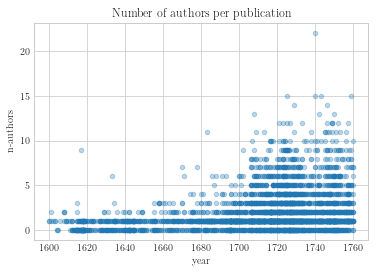

In [25]:
df.plot.scatter(x="year", y="nauthors", alpha=0.3)
plt.title('Number of authors per publication')
#plt.savefig('n_authors.png', dpi=300)

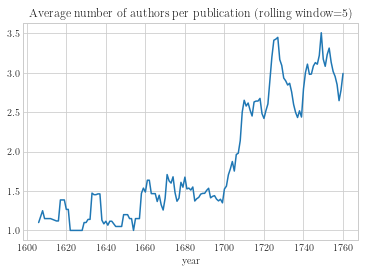

In [55]:
n_authors_year.rolling(window=5).mean().plot()
plt.title('Average number of authors per publication (rolling window=5)')
plt.savefig('n_authors_rolling_without_0.png', dpi=300)

# 3. Printers

In [7]:
printers = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [ ]:
#printers.to_csv('printers.csv', sep=';')

In [8]:
printers.value_counts()

1      330
2      121
3       49
4       33
5       22
6       19
7       14
8       10
9        6
11       3
15       3
10       3
12       3
19       2
17       2
13       2
122      1
94       1
16       1
18       1
21       1
23       1
49       1
59       1
74       1
92       1
14       1
Name: Drukker, dtype: int64

# 4. Couples

In [9]:
couples = df.groupby('Bruidspaar')['Bruidspaar'].count().sort_values(ascending=False)

In [10]:
couples.sum(axis = 0, skipna = True)

3696

In [11]:
couples.count()

3302

In [ ]:
#df1.to_csv('Allebruidsparen.csv', sep='\t')

# 5. Searching for certain value

In [6]:
df[df['Alleauteurs'].str.contains("Starter", na=False)]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,nauthors
0,,,,,,,,,,,,,,,,,,,,,
932,KB,1612.0,David Wachtendonck,Debora Nannings,David Wachtendonck & Debora Nannings,Cornelis Fransz,Amsterdam,NaN,Jan Jansz Starter,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan Jansz Starter,1
1599,KB,1616.0,Eerich Steinsz Brahe,Licia van Eysinga,Eerich Steinsz Brahe & Licia van Eysinga,Abraham van den Rade,Leeuwarden,NaN,Jan Jansz Starter,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan Jansz Starter,1
1163,KB,1622.0,Henricus Joannes Oetgens,Margarita Storm,Henricus Joannes Oetgens & Margarita Storm,Broer Jansz,Amsterdam,Amsterdam,Jan Jansz Starter,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan Jansz Starter,1


In [7]:
df.loc[df['nauthors'] == 22]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,nauthors
0,,,,,,,,,,,,,,,,,,,,,
3085,KB,1740.0,Josua van der Poorten,Hillegonda Josina van Eik,Josua van der Poorten & Hillegonda Josina van Eik,NaN,NaN,Sloterdijk,Justus van Maurik,Wilhem Suderman,...,Gerrit Blaaupot,Abraham Suderman,Dirk Willink,Matthijs Straalman,E.C.,Frans van Steenwyk,Abraham de (1707-1748) Haen,F.B.S.,"Justus van Maurik, Wilhem Suderman, Pieter van...",22


In [8]:
df[(df.Database =='STCN') & (df.nauthors == 0)]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,nauthors
0,,,,,,,,,,,,,,,,,,,,,
3406,STCN,1605.0,Abraham van der Voort,Elisabet Rekenaer,Abraham van der Voort & Elisabet Rekenaer,NaN,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3668,STCN,1615.0,Willem Luyt Kittensteyn,Maria Lambrechts Cocqus,Willem Luyt Kittensteyn & Maria Lambrechts Cocqus,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3669,STCN,1617.0,Jacob Danielsz. De Bergh,Anna Floris dochter,Jacob Danielsz. De Bergh & Anna Floris dochter,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3695,STCN,1618.0,Steven Doensz. Groenendijck,Annetgen Pieters de Lange,Steven Doensz. Groenendijck & Annetgen Pieters...,Jasper Tournay,Gouda,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3670,STCN,1621.0,Antonis Pietersz van Dieningen,Mayken Daniels de Bergh,Antonis Pietersz van Dieningen & Mayken Daniel...,Jan Andriesz Cloeting,Delft,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3628,STCN,1627.0,Cornelis van Swanenburch,Cecilia van der Gracht,Cornelis van Swanenburch & Cecilia van der Gracht,Jan Jacobsz Paets,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3527,STCN,1628.0,Dirck Jansen de Hoogh,Maria Goverts Knol,Dirck Jansen de Hoogh & Maria Goverts Knol,Harmen Jansz (erven) Muller,Amsterdam,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3689,STCN,1641.0,Adriaen Imertsen,Ienneken Rinck,Adriaen Imertsen & Ienneken Rinck,Jan van (V) Turnhout,s-Hertogenbosch,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3684,STCN,1642.0,Adriaen de Riick,Maria Walckier,Adriaen de Riick & Maria Walckier,Jan Jansz van Dorp,Leiden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# 6. Calculate publications by year

In [13]:
df_year = df[(df['Jaar'] >= 1600)
& (df['Jaar'] <= 1760)]

In [31]:
years = df.groupby('year')['year'].count()

In [50]:
years.iloc[128:159].mean()

39.61290322580645

In [3]:
df = df.rename(columns = {'Jaar':'year'})

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/alielassche/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


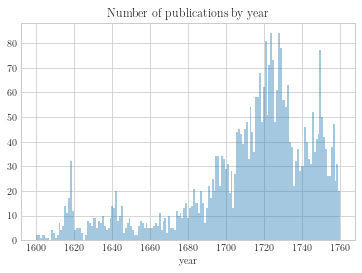

In [30]:
sns.distplot(df['year'], kde=False, bins=161)
plt.title('Number of publications by year')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyear.png', dpi=300)

In [10]:
df.shape

(3696, 31)

In [11]:
df_year.shape

(3679, 31)

# 7. Name connections

## 7.1 Split first name and last name

In [9]:
df[['firstname_bride', 'lastname_bride']] = df.Bruid.str.rsplit(' ', 1, expand=True)
df[['firstname_groom', 'lastname_groom']] = df.Bruidegom.str.rsplit(' ', 1, expand=True)
df[['firstname_printer', 'lastname_printer']] = df.Drukker.str.rsplit(' ', 1, expand=True)

## 7.2 Create boolean for name connection

In [10]:
df['bride_authors'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Alleauteurs'], axis=1)
df['groom_authors'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Alleauteurs'], axis=1)
df['bride_printer'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Drukker'], axis=1)
df['groom_printer'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Drukker'], axis=1)
df['Printer_authors'] = df.fillna('').apply(lambda row: row['Drukker'] in row['Alleauteurs'], axis=1)
df['lastnameprinter_authors'] = df.fillna('').apply(lambda row: row['lastname_printer'] in row['Alleauteurs'], axis=1)

### 7.2.1 Results (NaN included)

In [11]:
print(df.groupby('bride_authors')['bride_authors'].count())
print(df.groupby('groom_authors')['groom_authors'].count())
print(df.groupby('bride_printer')['bride_printer'].count())
print(df.groupby('groom_printer')['groom_printer'].count())
print(df.groupby('Printer_authors')['Printer_authors'].count())
print(df.groupby('lastnameprinter_authors')['lastnameprinter_authors'].count())

bride_authors
False    3273
True      423
Name: bride_authors, dtype: int64
groom_authors
False    3145
True      551
Name: groom_authors, dtype: int64
bride_printer
False    3680
True       16
Name: bride_printer, dtype: int64
groom_printer
False    3672
True       24
Name: groom_printer, dtype: int64
Printer_authors
False    1780
True     1916
Name: Printer_authors, dtype: int64
lastnameprinter_authors
False    1486
True     2210
Name: lastnameprinter_authors, dtype: int64


### 7.2.2 Results (NaN excluded)

In [15]:
df1 = df[df['Printer_authors']==True]
df1_sum = df1.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)
df1_sum.sum()

351

In [17]:
df2 = df[df['lastnameprinter_authors']==True]
df2_sum = df2.groupby('lastname_printer')['lastname_printer'].count().sort_values(ascending=False)
df2_sum.sum()

357

## 7.3 Calculate number of name connections

In [27]:
df['bride_authors_count'] = df.fillna('').apply(lambda row: row['Alleauteurs'].count(row['lastname_bride']), axis=1)
df['groom_authors_count'] = df.fillna('').apply(lambda row: row['Alleauteurs'].count(row['lastname_groom']), axis=1)

### 7.3.1 Bride versus authors

In [52]:
df3 = df[df['bride_authors']==True]
df3.groupby('bride_authors_count')['bride_authors_count'].count()

bride_authors_count
1    328
2     81
3     11
4      3
Name: bride_authors_count, dtype: int64

In [50]:
df.groupby('lastname_bride')['bride_authors_count'].sum().sort_values(ascending=False)

lastname_bride
Bruyn           9
Sart            8
Burlett         7
Veen            6
Driest          6
Hoffham         5
Beeke           4
Schröder        4
Verlaan         4
Pielat          4
Croese          4
Doornik         4
Bergh           3
Heems           3
Houttuyn        3
Brandt          3
Ryser           3
Amstel          3
Eys             3
Huydecoper      3
Hoogenbergh     3
Hollebeek       3
Schutte         3
Muilman         3
Makreel         3
Okhuysen        3
Bols            3
Nolk            3
Muller          3
Christoffers    3
               ..
Out             0
Oudt            0
Oortmans        0
Oostbroek       0
Oostendorp      0
Oosterhuysen    0
Oostingh        0
Opdecamp        0
Ophoven         0
Ops             0
Opze            0
Opzy            0
Ormea           0
Ortt            0
Orville         0
Ossenberg       0
Ostade          0
Oterlyk         0
Otter           0
Otto            0
Oudaan          0
Oudaen          0
Oudenaerde      0
Oudenburg    

### 7.3.2 Groom versus authors

In [31]:
df4 = df[df['groom_authors']==True]
df4.groupby('groom_authors_count')['groom_authors_count'].count()

groom_authors_count
1    408
2     85
3     27
4     19
5      8
6      2
7      1
8      1
Name: groom_authors_count, dtype: int64

In [51]:
df.groupby('lastname_groom')['groom_authors_count'].sum().sort_values(ascending=False)

lastname_groom
Issendorp          20
Kinderen           14
Beukelaar          13
Andriessen          8
Bosch               8
Cramer              8
Beels               8
Bruyn               7
Burlett             7
Burman              7
Raket               7
Bruynvis            6
Koek                6
Visscher            6
Groot               6
Fortgens            6
Linthorst           6
Luchtmans           5
Hoffmann            5
Claus               5
Lelyveld            5
Schim               5
Martens             5
Veeckens            5
Buck                5
Sart                5
Pembroek            5
Arrewyne            5
Noorlé              5
Oosterdyk           5
                   ..
Ossenberg           0
Ortt                0
Ofze                0
Nuld                0
Nutges              0
Nuys                0
Nyendaal            0
Nyholt              0
Nylant              0
Nyvelzeels          0
Obry                0
Ockersse            0
Ode                 0
Oetgens          

### 7.3.3 Couples versus authors

In [34]:
df4['couple_name'] = df4.fillna('').apply(lambda row: row['lastname_groom'].count(row['lastname_bride']), axis=1)

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df4.groupby('couple_name')['couple_name'].count()

couple_name
0    543
1      8
Name: couple_name, dtype: int64

In [37]:
df4.loc[df4['couple_name'] == 1]

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,bride_authors,groom_authors,bride_printer,groom_printer,Printer_authors,lastnameprinter_authors,nieuwe poging,bride_authors_count,groom_authors_count,couple_name
0,,,,,,,,,,,,,,,,,,,,,
1679,KB,1706.0,Jan Abraham Willink,Hillegonda Willink,Jan Abraham Willink & Hillegonda Willink,Jan Rieuwertsz,Amsterdam,Dordrecht,Jakob Huisduinen,Daniel Willink,...,True,True,False,False,False,False,1,1,1,1
961,KB,1714.0,Michiel Bruynvis,Anna Bruynvis,Michiel Bruynvis & Anna Bruynvis,Hendrik van de Gaete,Amsterdam,NaN,Hendrik van de Gaete,Ysbrand Ysbrandsz Vincent,...,True,True,False,False,True,True,1,1,1,1
158,KB,1729.0,Jan Izaaksz van den Bogaerd,Magdalena Maria van den Bogaerd,Jan Izaaksz van den Bogaerd & Magdalena Maria ...,Verbeek,Leiden,Amsterdam,Cornelis Izaaksz van den Bogaerd,J.V.M.,...,True,True,False,False,False,True,1,1,1,1
660,KB,1730.0,Hendrik Hoffham,Geertruyd Hoffham,Hendrik Hoffham & Geertruyd Hoffham,Gerrit Bouman,Amsterdam,Amsterdam,Gerard Hoffham,P. Hoffham,...,True,True,False,False,False,False,2,2,2,1
3208,KB,1748.0,Lucas Bols,Sara Zophia Bols,Lucas Bols & Sara Zophia Bols,NaN,NaN,Groningen,C. Bols,J. Bols,...,True,True,False,False,True,True,3,3,3,1
479,KB,1751.0,Jan Alting,Swana Francina Alting,Jan Alting & Swana Francina Alting,NaN,NaN,Delft,Lucas Trip,Bernhardus Alting,...,True,True,False,False,True,True,1,1,1,1
1051,KB,1757.0,Izaak Du Sart,Helena Du Sart,Izaak Du Sart & Helena Du Sart,Jacobus Haffman,Amsterdam,Amsterdam,Du R.D.B.,Izaak (Jr) Du Sart,...,True,True,False,False,False,False,3,3,3,1
703,KB,NaN,Daam van Leuve,Sara van Leuve,Daam van Leuve & Sara van Leuve,Arentsz,Amsterdam,Amsterdam,Roeland van Leuve,NaN,...,True,True,False,False,False,True,1,1,1,1


### 7.3.4 Printer versus author

In [54]:
df3 = df[df['Printer_authors']==True]
df3.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

Drukker
Joannes Oosterwyk                   94
Hendrik van de Gaete                53
Lescailje                           34
Joannes van Braam                   17
Geldorp                             12
Arnold Willis                       12
Goeree                               7
Joris van der Woude                  6
Petrus Dathenus                      5
Hendrik Sligtenhorst                 4
François Halma                       4
David Ruarus                         4
Johannes Rotterdam                   4
Abraham Blussé                       4
Hendrik Bosch                        4
Wetstein                             4
Arnoldus Lobedanius                  3
Willem Barents                       3
Cornelis Lelivelt                    3
Johan van Doesburg                   3
Reinier Boitet                       3
Arnoldus Olofsen                     2
Hendrik Callenbach                   2
Hendrik Smets                        2
Gijsbert Rijkman                     2
Hendrik Stockinck

### 7.3.5 Groom versus printer

In [55]:
df5 = df[df['groom_printer']==True]
df5.groupby('lastname_groom')['lastname_groom'].count().sort_values(ascending=False)

lastname_groom
Groot         2
Elzevier      1
Aertsz        1
Bos           1
Broen         1
Bruyn         1
Casteleyn     1
Castricum     1
Commelin      1
Damme         1
Duim          1
Willis        1
Wetstein      1
Hackius       1
Heuvel        1
Hulkenroy     1
Klinkhamer    1
Leeuwen       1
Poolsum       1
Ribbius       1
Scheltus      1
Schouten      1
Aardenberg    1
Name: lastname_groom, dtype: int64

### 7.3.6 Bride versus printer

In [18]:
df6 = df[df['bride_printer']==True]
df6.groupby('lastname_bride')['lastname_bride'].count().sort_values(ascending=False)

lastname_bride
Scheltus      2
Oosterwyk     2
Groot         2
Wetstein      1
Visch         1
Rieuwertsz    1
Ribbius       1
Ravesteyn     1
Marcus        1
Geldorp       1
Damme         1
Broers        1
Bergh         1
Name: lastname_bride, dtype: int64

# Overig

In [56]:
df7 = df.groupby(['Jaar', 'Bruidspaar'])['Bruidspaar'].count().sort_values(ascending=False)

In [58]:
df7

Jaar    Bruidspaar                                                                  
1756.0  Lieve Geelvinck (1730-1757) & Catharina Elisabeth Hasselaer                     5
1753.0  Joan Frederik d' Orville & Maria Philippina Schryver                            5
1728.0  Jan Six (1668-1750) & Anna Elisabeth van den Bempden                            5
1750.0  Christian Scholten van Aschat & Johanna Catharina van Wesele                    5
1718.0  Herman Vingerhoedt (1697-1762) & Johanna Ignatia van der Hoeven                 4
1750.0  Petrus Nieuwland (1722-1795) & Maria Margareta Mees                             4
1627.0  Pieter Cornelisz Hooft & Eleonora Hellemans                                     4
1743.0  Coenraad van Son & Anna Hollebeek                                               4
1716.0  Theodore François de Mey & Kornelia Vingerhoedt                                 4
1728.0  Gerard Aarnoud Hasselaer & Elisabeth Clignet                                    3
1717.0  Hermanu

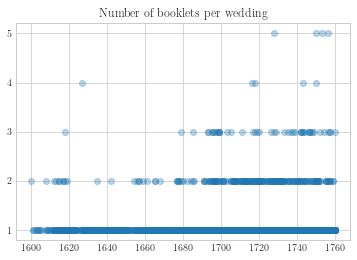

In [66]:
import numpy as np
plt.scatter(x=df7.index.get_level_values(0), y=df7.values, alpha=0.3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.yticks(np.arange(1, 6, step=1))
plt.title('Number of booklets per wedding')
plt.savefig('n_booklets_wedding.png', dpi=300)